In [5]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import h3
import json
import folium
from geojson.feature import *
import streamlit as st
import branca.colormap as cm 
import folium
from streamlit_folium import folium_static
from folium import Map, Marker, GeoJson 

import pandas as pd 

gdf = gpd.read_file('../data/raw/kontur_population_KE_20231101.gpkg')

In [ ]:
df = pd.read_file('../../data/processed/KEN_h3_data_full.csv')

In [6]:
gdf.total_bounds

array([3773951.2226856 , -546637.76715794, 4665760.0128112 ,
        515708.02861914])

In [7]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
len(gdf)

231360

In [45]:
gdf_test = gdf.copy()
gdf_test = gdf_test.to_crs('EPSG:4326')

In [48]:
len(gdf_test)

231360

In [36]:
gdf.head()

,h3,population,geometry
0,887b5bb76dfffff,214.0,"POLYGON ((4470667.403 -341703.95, 4470853.105 ..."
1,887b5bb76bfffff,1150.0,"POLYGON ((4469025.536 -341952.142, 4469211.29 ..."
2,887b5bb769fffff,209.0,"POLYGON ((4469934.407 -342305.718, 4470120.135..."
3,887b5bb765fffff,237.0,"POLYGON ((4470491.565 -340748.674, 4470677.266..."
4,887b5bb763fffff,359.0,"POLYGON ((4468849.737 -340996.802, 4469035.49 ..."


In [54]:
len(gdf)

231360

In [51]:
len(df_aggreg_age_demographics)

241169

In [65]:
gdf_wgs84 = gdf.to_crs(epsg=4326)
gdf['lon'] = gdf_wgs84.geometry.centroid.x
gdf['lat'] = gdf_wgs84.geometry.centroid.y
gdf['lat'] = gdf['lat'].astype('float32')
gdf['lon'] = gdf['lon'].astype('float32')

/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_11395/735720476.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf_wgs84.geometry.centroid.x
/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_11395/735720476.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf_wgs84.geometry.centroid.y


In [66]:
gdf.head()

,h3,population,geometry,lon,lat
0,887b5bb76dfffff,214.0,"POLYGON ((4470667.403 -341703.95, 4470853.105 ...",40.157440,-3.064198
1,887b5bb76bfffff,1150.0,"POLYGON ((4469025.536 -341952.142, 4469211.29 ...",40.142693,-3.066424
2,887b5bb769fffff,209.0,"POLYGON ((4469934.407 -342305.718, 4470120.135...",40.150856,-3.069596
3,887b5bb765fffff,237.0,"POLYGON ((4470491.565 -340748.674, 4470677.266...",40.155861,-3.055629
4,887b5bb763fffff,359.0,"POLYGON ((4468849.737 -340996.802, 4469035.49 ...",40.141113,-3.057854


In [82]:
def create_multi_resolution_data(df, min_resolution, max_resolution):
    multi_res_list = []
    
    for res in range(min_resolution, max_resolution + 1):
        df_res = df.copy()
        df_res['h3_parent'] = df_res['h3'].apply(lambda x: h3.h3_to_parent(x, res))
        df_res = df_res.groupby('h3_parent').agg({
            'population': 'sum',
            'lat': 'mean',
            'lon': 'mean'
        }).reset_index()
        df_res['resolution'] = res
        multi_res_list.append(df_res)
    
    # Concatenate all the results into a single DataFrame
    final_df = pd.concat(multi_res_list, ignore_index=True)
    return final_df

In [83]:
population_df_all_res = create_multi_resolution_data(gdf, min_resolution=3, max_resolution=8)

In [84]:
population_df_all_res.head()

,h3_parent,population,lat,lon,resolution
0,836a58fffffffff,99573.0,4.308406,34.592590,3
1,836a59fffffffff,87552.0,4.296055,35.546925,3
2,836a5afffffffff,1932.0,3.747018,34.261742,3
3,836a5bfffffffff,227074.0,3.388549,35.023266,3
4,836a5dfffffffff,1.0,4.616663,35.183819,3


In [72]:
population_df_all_res.head()

,3,4,5,6,7,8
0,h3_parent population lat ...,h3_parent population lat ...,h3_parent population lat ...,h3_parent population lat ...,h3_parent population lat ...,h3_parent population lat ...


In [58]:
gdf_wgs84.head()

,h3,population,geometry
0,887b5bb76dfffff,214.0,"POLYGON ((40.16069 -3.06811, 40.16236 -3.06346..."
1,887b5bb76bfffff,1150.0,"POLYGON ((40.14594 -3.07034, 40.14761 -3.06568..."
2,887b5bb769fffff,209.0,"POLYGON ((40.1541 -3.07351, 40.15577 -3.06885,..."
3,887b5bb765fffff,237.0,"POLYGON ((40.15911 -3.05954, 40.16078 -3.05489..."
4,887b5bb763fffff,359.0,"POLYGON ((40.14436 -3.06177, 40.14603 -3.05711..."


In [48]:
gdf['longitude'] = gdf_wgs84.geometry.centroid.x
gdf['latitude'] = gdf_wgs84.geometry.centroid.y

/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_11395/3746511912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['longitude'] = gdf_wgs84.geometry.centroid.x
/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_11395/3746511912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['latitude'] = gdf_wgs84.geometry.centroid.y


In [50]:
gdf.head(15)

,geometry,longitude,latitude
0,"POLYGON ((41.90708 -4.68042, 41.90708 5.03375,...",37.908333,0.176667


In [51]:
gdf['latitude'] = gdf['latitude'].astype('float32')
gdf['longitude'] = gdf['longitude'].astype('float32')

In [52]:
gdf.head()

,geometry,longitude,latitude
0,"POLYGON ((41.90708 -4.68042, 41.90708 5.03375,...",37.908333,0.176667


In [3]:
gdf.columns

Index(['h3', 'population', 'geometry'], dtype='object')

In [44]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Currently the gdf (population data is in epsg:3857), but the age demographics data are in CRS.from_epsg(4326)

In [28]:
gdf.head()

,h3,population,geometry
0,887b5bb76dfffff,214.0,"POLYGON ((4470667.403 -341703.95, 4470853.105 ..."
1,887b5bb76bfffff,1150.0,"POLYGON ((4469025.536 -341952.142, 4469211.29 ..."
2,887b5bb769fffff,209.0,"POLYGON ((4469934.407 -342305.718, 4470120.135..."
3,887b5bb765fffff,237.0,"POLYGON ((4470491.565 -340748.674, 4470677.266..."
4,887b5bb763fffff,359.0,"POLYGON ((4468849.737 -340996.802, 4469035.49 ..."


In [34]:
gdf['resolution'] = gdf['h3'].apply(lambda value: h3.h3_get_resolution(value))

print(gdf.head())

                h3  population  \
0  887b5bb76dfffff       214.0   
1  887b5bb76bfffff      1150.0   
2  887b5bb769fffff       209.0   
3  887b5bb765fffff       237.0   
4  887b5bb763fffff       359.0   

                                            geometry  resolution  
0  POLYGON ((4470667.403 -341703.95, 4470853.105 ...           8  
1  POLYGON ((4469025.536 -341952.142, 4469211.29 ...           8  
2  POLYGON ((4469934.407 -342305.718, 4470120.135...           8  
3  POLYGON ((4470491.565 -340748.674, 4470677.266...           8  
4  POLYGON ((4468849.737 -340996.802, 4469035.49 ...           8  


In [43]:
gdf.columns

Index(['h3', 'population', 'geometry', 'resolution'], dtype='object')

In [21]:
gdf['resolution'].nunique()

1

In [4]:
gdf.columns = gdf.columns.str.strip()
# gdf = gdf.head(1000)

In [7]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "population"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["h3"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["h3"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["h3"]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

In [35]:
geojson_res = hexagons_dataframe_to_geojson(gdf)

In [11]:
from folium.plugins import FastMarkerCluster

In [12]:
def choropleth_map(df_aggreg, border_color = 'black', fill_opacity = 0.7, initial_map = None, with_legend = False,
                   kind = "linear"):   
    #colormap
    min_value = df_aggreg["population"].min()
    max_value = df_aggreg["population"].max()
    m = round ((min_value + max_value ) / 2 , 0)
    
    #take resolution from the first row
    res = h3.h3_get_resolution(df_aggreg.loc[0, 'h3'])
    
    if initial_map is None:
        initial_map = Map(location= [-1.286389, 36.817223], zoom_start=6, tiles="cartodbpositron", 
                attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>' 
            )
        

    #the colormap 
    #color names accepted https://github.com/python-visualization/branca/blob/master/branca/_cnames.json
    if kind == "linear":
        custom_cm = cm.LinearColormap(['green','yellow','red'], vmin=min_value, vmax=max_value)
    elif kind == "outlier":
        #for outliers, values would be -11,0,1
        custom_cm = cm.LinearColormap(['blue','white','red'], vmin=min_value, vmax=max_value)
    elif kind == "filled_nulls":
        custom_cm = cm.LinearColormap(['sienna','green','yellow','red'], 
                                      index=[0,min_value,m,max_value],vmin=min_value,vmax=max_value)
   

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg)
    
    #plot on map
    name_layer = "Choropleth " + str(res)
    if kind != "linear":
        name_layer = name_layer + kind
        
    GeoJson(
        geojson_data,
        style_function = lambda feature: {
            'fillColor': custom_cm(feature['properties']['population']),
            'color': border_color,
            'weight': 1,
            'Highlight': True,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    #add legend (not recommended if multiple layers)
    if with_legend == True:
        custom_cm.add_to(initial_map)   
    
    
    return initial_map

In [13]:
hexmap = choropleth_map(df_aggreg = gdf[:100], with_legend = True, kind = "filled_nulls") 

In [17]:
# Sidebar controls
st.sidebar.header("Map Controls")
num_hexagons = st.sidebar.slider("Number of hexagons to display", 100, len(gdf), 1000)
kind = st.sidebar.selectbox("Color scheme", ["linear", "outlier", "filled_nulls"])
with_legend = st.sidebar.checkbox("Show legend", value=True)

# Create and display map
st.write(f"Displaying {num_hexagons} hexagons")
hexmap = choropleth_map(df_aggreg=gdf[:num_hexagons], with_legend=with_legend, kind=kind)
folium_static(hexmap)

2024-11-04 21:58:59.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 21:58:59.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 9597, 'height': 11657, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.000833333329998958, 0.0, 33.909583213,
       0.0, -0.0008333333300162993, 5.033750181)}


Shape: (11657, 9597)
Data type: float32
Minimum value: -3.3999999521443642e+38
Maximum value: 16.674135208129883
Mean value: -inf


/Users/ahmedboutar/Desktop/Duke/Fall2024/AIPI510/dataset-project/mapping-for-economic-development/venv/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


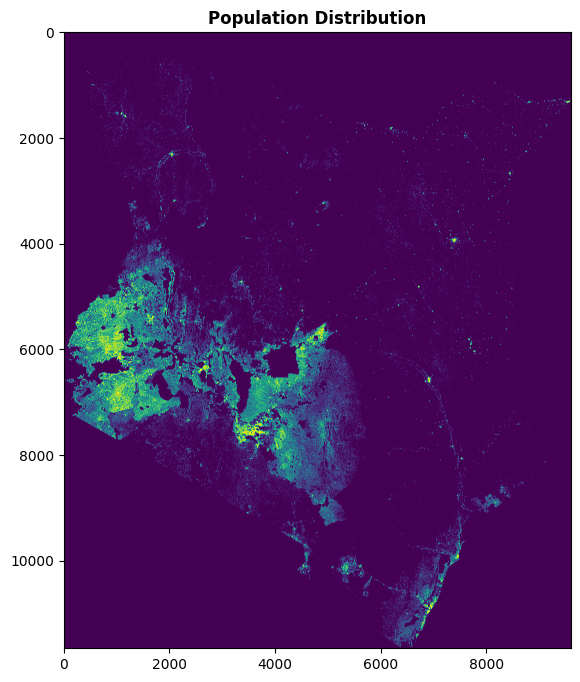

Bounding Box: BoundingBox(left=33.909583213, bottom=-4.680416447000001, right=41.907083181, top=5.033750181)
Total population: 703445.9375


In [3]:
import rasterio


import rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import box

# Open the GeoTIFF file
with rasterio.open('../data/KEN_population_v2_0_agesex/KEN_population_v2_0_agesex_f0.tif') as src:
    # Read the data
    band1 = src.read(1)
    
    # Get metadata
    meta = src.meta
    print("="*15)
    print(meta)
    print("="*15)
    print('\n')

    
    # Print basic information
    print(f"Shape: {band1.shape}")
    print(f"Data type: {band1.dtype}")
    print(f"Minimum value: {np.min(band1)}")
    print(f"Maximum value: {np.max(band1)}")
    print(f"Mean value: {np.mean(band1)}")
    
    # Create a simple visualization
    plt.figure(figsize=(12, 8))
    show(band1, cmap='viridis', title='Population Distribution')
    # plt.colorbar(label='Population')
    # plt.show()
    
    # Get the bounding box
    bounds = src.bounds
    bbox = box(*bounds)
    
    # Create a GeoDataFrame from the bounding box
    gdf = gpd.GeoDataFrame({'geometry': [bbox]}, crs=src.crs)
    
    # Print the bounding box coordinates
    print(f"Bounding Box: {bounds}")

# Calculate total population
with rasterio.open('../data/KEN_population_v2_0_agesex/KEN_population_v2_0_agesex_f0.tif') as src:
    band1 = src.read(1)
    total_population = np.sum(band1[band1 != src.nodata])
    print(f"Total population: {total_population}")

    

Source: https://wopr.worldpop.org/?KEN/Population

In [2]:
import rasterio
import pandas as pd
import numpy as np

# Open the raster file
with rasterio.open('../data/KEN_population_v2_0_agesex/KEN_population_v2_0_agesex_f0.tif') as src:
    band1 = src.read(1)  # Read the first band (population data)
    transform = src.transform  # Get the affine transformation

# Prepare a list to hold the data
data = []

# Get dimensions of the raster
height, width = band1.shape

# Loop through each pixel in the raster
for row in range(height):
    for col in range(width):
        # Get the population value for this pixel
        population_value = band1[row, col]

        # Skip no-data values if necessary (depending on your raster)
        if population_value != src.nodata:
            # Convert pixel coordinates to geographic coordinates
            lon, lat = transform * (col, row)  # (x, y) = (col, row)

            # Append the data as a tuple
            data.append((population_value, lon, lat))

# Create a DataFrame
df_population = pd.DataFrame(data, columns=['population_f0', 'lon', 'lat'])

# Optionally, reset the index
df_population.reset_index(drop=True, inplace=True)

# Display the DataFrame

KeyboardInterrupt: 

In [39]:
df_population.head()

,population_f0,lon,lat
0,0.279885,35.394583,4.627917
1,0.131445,35.395417,4.627917
2,0.361219,35.397917,4.627917
3,0.986145,35.398750,4.627917
4,0.119915,35.499583,4.627917


In [32]:
df_population.head()

,population_f0,lon,lat
0,0.279885,3.940133e+06,515774.32116
1,0.131445,3.940226e+06,515774.32116
2,0.361219,3.940504e+06,515774.32116
3,0.986145,3.940597e+06,515774.32116
4,0.119915,3.951830e+06,515774.32116


In [41]:
resolution = 8

df_age_demographics = df_population[["lat", "lon", "population_f0"]] 
df_age_demographics.rename(columns={'population_f0': 'population'}, inplace=True)
df_age_demographics['h3'] = df_population.apply(lambda row: h3.geo_to_h3(row["lat"], row["lon"], resolution), axis = 1) 
df_aggreg_age_demographics = df_age_demographics.groupby("h3")['population'].sum().reset_index() 
df_aggreg_age_demographics["geometry"] =  df_aggreg_age_demographics.h3.apply(lambda x: {"type" : "Polygon",
                                                           "coordinates": [h3.h3_to_geo_boundary(h=x,geo_json=True)]})
# df_age_demographics['population'] = df_population['population']


In [56]:
df_aggreg_age_demographics.total_bounds

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

In [42]:
len(gdf)

231360

In [44]:
len(df_aggreg_age_demographics)

241169

In [30]:
def save_dataframe_to_csv(dataframe, filepath):
    """
    Save a DataFrame to a CSV file.
    
    Parameters:
    dataframe (pandas.DataFrame): DataFrame to save
    filepath (str): Path where the CSV file should be saved
    
    Returns:
    None
    """
    try:
        dataframe.to_csv(filepath, index=False)
        print(f"DataFrame successfully saved to {filepath}")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame: {str(e)}")

In [28]:
df_population.head()

,population_f0,lon,lat
0,0.279885,3.940133e+06,515774.32116
1,0.131445,3.940226e+06,515774.32116
2,0.361219,3.940504e+06,515774.32116
3,0.986145,3.940597e+06,515774.32116
4,0.119915,3.951830e+06,515774.32116


In [33]:
save_dataframe_to_csv(df_population, './output/test.csv')

DataFrame successfully saved to ./output/test.csv


In [37]:
resolution = 8

In [22]:
resolution = 8

df_age_demographics = df_population[["lat", "lon", "population_f0"]] 
df_age_demographics.rename(columns={'population_f0': 'population'}, inplace=True)
df_age_demographics['h3'] = df_population.apply(lambda row: h3.geo_to_h3(row["lat"], row["lon"], resolution), axis = 1) 
df_aggreg_age_demographics = df_age_demographics.groupby("h3")['population'].sum().reset_index() 
df_aggreg_age_demographics["geometry"] =  df_aggreg_age_demographics.h3.apply(lambda x: {"type" : "Polygon",
                                                           "coordinates": [h3.h3_to_geo_boundary(h=x,geo_json=True)]})
# df_age_demographics['population'] = df_population['population']


In [23]:
df_aggreg_age_demographics.head()

,h3,population,geometry
0,8800000161fffff,0.100589,"{'type': 'Polygon', 'coordinates': [((38.38953..."
1,88000001c5fffff,0.099291,"{'type': 'Polygon', 'coordinates': [((38.22333..."
2,8800000209fffff,0.021407,"{'type': 'Polygon', 'coordinates': [((37.78210..."
3,88000004e7fffff,0.086284,"{'type': 'Polygon', 'coordinates': [((37.52301..."
4,88000005d1fffff,0.265389,"{'type': 'Polygon', 'coordinates': [((37.61094..."


In [25]:
df_aggreg_age_demographics.shape

(4880875, 3)

In [41]:
gdf.head()

,geometry
0,"POLYGON ((41.90708 -4.68042, 41.90708 5.03375,..."


In [42]:
df_aggreg_age_demographics.head()

,h3,population,geometry
0,886a58000dfffff,0.451687,"{'type': 'Polygon', 'coordinates': [((34.42288..."
1,886a580045fffff,0.027381,"{'type': 'Polygon', 'coordinates': [((34.41343..."
2,886a580047fffff,0.476617,"{'type': 'Polygon', 'coordinates': [((34.42150..."
3,886a58004dfffff,0.542941,"{'type': 'Polygon', 'coordinates': [((34.41205..."
4,886a580061fffff,0.058805,"{'type': 'Polygon', 'coordinates': [((34.40811..."


In [43]:
gdf.shape

(1, 1)

In [53]:
common_ids = gdf.merge(df_aggreg_age_demographics, on='h3', how='inner')
num_common_ids = len(common_ids)
print(num_common_ids)

186879


In [27]:
print(gdf.shape)

(231360, 3)


In [49]:
def find_unmatched_ids(df1, df2, id_column='id'):
    """
    Find IDs that don't match between two DataFrames.
    
    Parameters:
    df1 (pandas.DataFrame): First DataFrame
    df2 (pandas.DataFrame): Second DataFrame
    id_column (str): Name of the ID column (default: 'id')
    
    Returns:
    pandas.DataFrame: DataFrame containing unmatched IDs
    """
    # Get all unique IDs from both DataFrames
    all_ids = set(df1[id_column]).union(set(df2[id_column]))
    
    # Perform an inner join
    matched_ids = set(pd.merge(df1, df2, on=id_column)[id_column])
    
    # Find the difference
    unmatched_ids = all_ids - matched_ids
    
    # Create a new DataFrame with the unmatched IDs
    unmatched_df = pd.DataFrame({id_column: list(unmatched_ids)})
    
    return unmatched_df

def find_unmatched_ids_with_population(df1, df2, id_column='h3', population_column='population'):
    """
    Find IDs that don't match between two DataFrames and include their population values.
    
    Parameters:
    df1 (pandas.DataFrame): First DataFrame
    df2 (pandas.DataFrame): Second DataFrame
    id_column (str): Name of the ID column (default: 'id')
    population_column (str): Name of the population column (default: 'population')
    
    Returns:
    pandas.DataFrame: DataFrame containing unmatched IDs and their population values
    """
    # Get all unique IDs from both DataFrames
    all_ids = set(df1[id_column]).union(set(df2[id_column]))
    
    # Perform an inner join
    matched_ids = set(pd.merge(df1, df2, on=id_column)[id_column])
    
   # Perform an outer join to keep all rows from both dataframes
    merged_df = pd.merge(df1, df2, on='h3', how='outer', indicator=True)

    # Filter rows where the match indicator is either 'left_only' or 'right_only'
    unmatched_df = merged_df[merged_df['_merge'] != 'both']
    
    return unmatched_df

In [50]:
unmatched_df = find_unmatched_ids_with_population(gdf, df_aggreg_age_demographics, 'h3')

In [53]:
unmatched_df.shape

(98771, 6)

In [141]:
print(unmatched_df['population'].apply(lambda x: x <= 11).sum())

83827


In [34]:
def hexagon_centroid_join(df1, df2, h3_column='h3_index'):
    # Convert H3 indices to centroids
    def h3_to_centroid(h3_index):
        lat, lng = h3.h3_to_geo(h3_index)
        return gpd.points_from_xy([lng], [lat])[0]
    
    # Create GeoDataFrames with centroid geometries
    gdf1 = gpd.GeoDataFrame(df1, geometry=df1[h3_column].apply(h3_to_centroid))
    gdf2 = gpd.GeoDataFrame(df2, geometry=df2[h3_column].apply(h3_to_centroid))
    
    # Perform a spatial join
    joined = gpd.sjoin_nearest(gdf1, gdf2, how='outer', max_distance=0.001)  # Adjust max_distance as needed
    
    return joined


In [140]:
unmatched_df.shape

(98771, 2)

In [137]:
age_demographics_geojson = hexagons_dataframe_to_geojson(unmatched_df)

In [138]:
hexmap = choropleth_map(df_aggreg = unmatched_df, with_legend = True, kind = "filled_nulls") 

In [ ]:
hexmap

In [38]:

# Group by lon and lat and count the unique pairs
unique_count = df_population.groupby(['lon', 'lat']).size().reset_index(name='count')

# Get the number of unique pairs
num_unique_pairs = unique_count.shape[0]
print(num_unique_pairs)

4970018


In [27]:
gdf.head(5)

,geometry
0,"POLYGON ((41.90708 -4.68042, 41.90708 5.03375,..."


In [23]:
band1[0:1, 0:1]

array([[-3.4e+38]], dtype=float32)

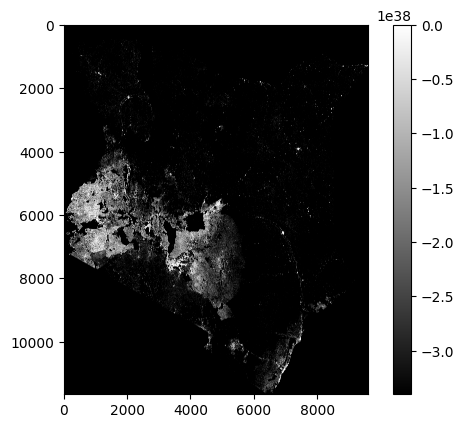

In [19]:
import matplotlib.pyplot as plt

plt.imshow(band1, cmap='gray')
plt.colorbar()
plt.show()

## Plotting

In [ ]:
# Create a simple plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='population', legend=True, cmap='viridis', 
         legend_kwds={'label': 'Population', 'orientation': 'horizontal'})

plt.title("Population Distribution")
plt.axis('off')
plt.show()

In [7]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
import geopandas as gpd

# Convert to GeoJSONDataSource
geosource = GeoJSONDataSource(geojson=gdf.to_json())

# Define color palette
palette = brewer['YlOrRd'][8]
color_mapper = LinearColorMapper(palette=palette, low=gdf['population'].min(), high=gdf['population'].max())

# Create figure
p = figure(title="Population Distribution", toolbar_location="below", tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure
p.patches('xs', 'ys', source=geosource, fill_color={'field': 'population', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Add ColorBar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0,0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Output to file
output_file("population_map.html")
show(p)

In [166]:
df_f45 = pd.read_csv('./output/df_h3/df_KEN_agesex_population_f45.csv')
df_f50 = pd.read_csv('./output/df_h3/df_KEN_agesex_population_f50.csv')
df_m10 = pd.read_csv('./output/df_h3/df_KEN_agesex_population_m10.csv')

In [175]:
df_f45.head()

,population_f45,lon,lat
0,0.244674,35.394583,4.627917
1,0.114908,35.395417,4.627917
2,0.315775,35.397917,4.627917
3,0.862081,35.398750,4.627917
4,0.104829,35.499583,4.627917


In [180]:
def gis_df_to_h3_df(df, population_column_name):
    print(f'Processing df for {population_column_name}')
    resolution = 8
    try:
        df['h3'] = df.apply(lambda row: h3.geo_to_h3(row["lat"], row["lon"], resolution), axis = 1) 
        df_h3_agg = df.groupby("h3")[population_column_name].sum().reset_index() 
        print("Successfuly created the h3 df")
    except:
        print("An error has occured while converting lat and lon to h3")
    
    return df_h3_agg

In [189]:
df_h3_f45 = gis_df_to_h3_df(df_f45, 'population_f45') 

Processing df for population_f45
Successfuly created the h3 df


In [57]:
from scipy.spatial import cKDTree

In [58]:
from shapely.geometry import Point

In [50]:
from shapely.geometry import Polygon

In [ ]:
from shapely.geometry import Polygon

def cell_to_shapely(cell):
    coords = h3.h3_to_geo_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)

h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

In [32]:
df_h3_agesex = pd.read_csv('./output/KEN_agesex_aggregated.csv')

In [58]:
df_aggreg_age_demographics.shape

(241169, 3)

In [54]:
df = hexagon_overlap_join(gdf, df_aggreg_age_demographics, 'h3')

/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_95618/1679927494.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  joined = gpd.sjoin(gdf1, gdf2, how='inner', predicate='intersects')


In [55]:
df.head(5)

,h3_left,population_left,geometry,index_right,h3_right,population_right
0,887b5bb76dfffff,214.0,"POLYGON ((40.161 -3.068, 40.162 -3.063, 40.159...",240845,887b5bb297fffff,1.013906
0,887b5bb76dfffff,214.0,"POLYGON ((40.161 -3.068, 40.162 -3.063, 40.159...",241166,887b5bb769fffff,3.554205
0,887b5bb76dfffff,214.0,"POLYGON ((40.161 -3.068, 40.162 -3.063, 40.159...",240851,887b5bb2bbfffff,3.168259
0,887b5bb76dfffff,214.0,"POLYGON ((40.161 -3.068, 40.162 -3.063, 40.159...",241168,887b5bb76dfffff,4.647244
0,887b5bb76dfffff,214.0,"POLYGON ((40.161 -3.068, 40.162 -3.063, 40.159...",241163,887b5bb761fffff,5.450635
